In [11]:
#Basic imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [1]:
# Initial imports
import os
from pathlib import Path
from dotenv import load_dotenv

True

In [ ]:
# Load .env environment variables
load_dotenv()

In [2]:
import alpaca_trade_api as tradeapi

API_KEY = os.getenv("ALPACA_API_KEY")
API_SECRET = os.getenv("ALPACA_SECRET_KEY")
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

api = tradeapi.REST(API_KEY, API_SECRET, ALPACA_API_BASE_URL, api_version="v2")

In [3]:
# Set the ticker
ticker = "SPY"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("now").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000
    
# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

ticker_data

SPY                                    
                             open    high       low   close    volume
time                                                                 
2018-01-19 00:00:00-05:00  279.80  280.40  279.1400  280.38  55178145
2018-01-22 00:00:00-05:00  280.17  282.68  280.1100  282.67  47776828
2018-01-23 00:00:00-05:00  282.74  283.62  282.3700  283.26  53406595
2018-01-24 00:00:00-05:00  283.99  284.70  281.8400  283.18  77334662
2018-01-25 00:00:00-05:00  284.16  284.27  282.4050  283.28  51821059
...                           ...     ...       ...     ...       ...
2021-12-31 00:00:00-05:00  475.64  476.86  474.6700  474.89  51212452
2022-01-03 00:00:00-05:00  476.32  477.85  473.8500  477.76  56128214
2022-01-04 00:00:00-05:00  479.22  479.98  475.5800  477.51  59093344
2022-01-05 00:00:00-05:00  477.16  477.98  468.2801  468.38  87411658
2022-01-06 00:00:00-05:00  467.89  470.82  465.4300  467.93  78577470

[1000 rows x 5 columns]

In [12]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1012

In [13]:
spy_df["Daily Return"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()
spy_df["Trading Signal"] = ""
spy_df.dropna(inplace= True)

#-1 is to buy and 1 is to sell
for index, row in spy_df.iterrows():
    if  row["Daily Return"] >= 0:
        spy_df.loc[index, "Trading Signal"] = -1
    else:
        spy_df.loc[index, "Trading Signal"] = 1

spy_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Actual Return,Trading Signal
Date,,,,,,,,,,
2018-01-03,250.947258,252.514767,250.947258,252.356140,90070400,0.0,0,1.586105,0.006325,-1
2018-01-04,253.037283,253.932982,252.421481,253.419800,80636400,0.0,0,1.063660,0.004215,-1
2018-01-05,254.259568,255.239236,253.737074,255.108627,83524000,0.0,0,1.688828,0.006664,-1
2018-01-08,255.005957,255.743057,254.698070,255.575119,57319200,0.0,0,0.466492,0.001829,-1
2018-01-09,256.022957,256.816037,255.724381,256.153595,57254000,0.0,0,0.578476,0.002263,-1
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,475.640015,476.859985,474.670013,474.959991,65210500,0.0,0,-1.200012,-0.002520,1
2022-01-03,476.299988,477.850006,473.850006,477.709991,72668200,0.0,0,2.750000,0.005790,-1
2022-01-04,479.220001,479.980011,475.579987,477.549988,71178700,0.0,0,-0.160004,-0.000335,1


In [14]:
from finta import TA

In [16]:
averages_indicators = pd.DataFrame()

short_window = 7
long_window = 30

averages_indicators["sma_7"] = spy_df["Close"].rolling(window = short_window).mean()
averages_indicators["sma_30"] = spy_df["Close"].rolling(window = long_window).mean()
averages_indicators["ssma"] = TA.SSMA(spy_df)
averages_indicators["ema"] = TA.EMA(spy_df, 50)
averages_indicators["dema"] = TA.DEMA(spy_df)
averages_indicators["tema"] = TA.TEMA(spy_df)
averages_indicators["trima"] = TA.TRIMA(spy_df)
averages_indicators["Signal"] = spy_df["Trading Signal"]

averages_indicators = averages_indicators.dropna()
averages_indicators

,sma_7,sma_30,ssma,ema,dema,tema,trima,Signal
Date,,,,,,,,
2018-02-22,252.394821,256.504417,253.013628,255.037966,251.789403,253.045610,258.151834,-1
2018-02-23,253.555771,256.522765,253.385489,255.103445,253.363443,254.958263,257.755037,-1
2018-02-26,254.663398,256.578122,254.049888,255.315924,255.560360,257.581957,257.314612,-1
2018-02-27,254.849997,256.469579,254.274782,255.352813,255.949582,257.587044,256.823044,1
2018-02-28,254.655411,256.304124,254.183013,255.258705,255.268839,256.216369,256.279381,1
...,...,...,...,...,...,...,...,...
2021-12-31,474.431431,465.045138,469.306560,461.902414,476.654777,477.776731,463.010469,1
2022-01-03,475.862858,465.365954,470.240275,462.522319,477.701693,478.600916,463.383192,-1
2022-01-04,476.855713,465.709337,471.052465,463.111640,478.314450,478.880936,463.768088,1


In [17]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

X = averages_indicators[['sma_7', 'sma_30', 'ssma', 'ema', 'dema', 'tema', 'trima']].shift().dropna().copy()
y = averages_indicators["Signal"]

training_begin = X.index.min()
training_end = training_end = X.index.min() + DateOffset(months=36)

X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

y_train=y_train.astype('int')

X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

y_test=y_test.astype('int')

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model = SVC()

model = model.fit(X_resampled, y_resampled)
training_signal_predictions = model.predict(X_resampled)
training_report = classification_report(y_resampled, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

          -1       0.54      0.34      0.42       429
           1       0.52      0.72      0.60       429

    accuracy                           0.53       858
   macro avg       0.53      0.53      0.51       858
weighted avg       0.53      0.53      0.51       858



In [19]:
testing_signal_predictions = model.predict(X_test_scaled)
backtesting_report = classification_report(y_test, testing_signal_predictions)
print(backtesting_report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       127
           1       0.43      1.00      0.60        95

    accuracy                           0.43       222
   macro avg       0.21      0.50      0.30       222
weighted avg       0.18      0.43      0.26       222



C:\Users\ahe04\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahe04\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahe04\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='Date'>

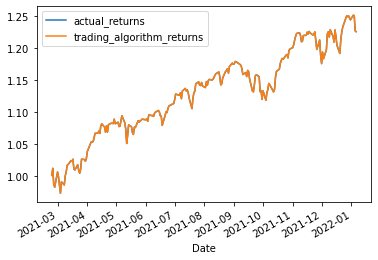

In [20]:
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_returns'] = testing_signal_predictions
predictions_df['predicted_returns'].value_counts()

predictions_df['actual_returns'] = spy_df["Actual Return"]
predictions_df['trading_algorithm_returns'] = predictions_df['actual_returns'] * predictions_df['predicted_returns']

(1 + predictions_df[['actual_returns', 'trading_algorithm_returns']]).cumprod().plot()